In [2]:
# 

import pandas as pd
data = pd.read_csv('~/billboard_top_100-master/billboard_top_songs.csv')

In [134]:
print(data.head())

   Unnamed: 0  index  year rank              title  \
0           0      0  1950    1  "Goodnight Irene"   
1           1      1  1950    2        "Mona Lisa"   
2           2      2  1950    3  "Third Man Theme"   
3           3      3  1950    4       "Sam's Song"   
4           4      4  1950    5    "Simple Melody"   

                         artist  \
0  Gordon Jenkins & The Weavers   
1                 Nat King Cole   
2                   Anton Karas   
3            Gary & Bing Crosby   
4            Gary & Bing Crosby   

                                                link  
0     https://en.wikipedia.org/wiki/Goodnight,_Irene  
1  https://en.wikipedia.org/wiki/Mona_Lisa_(Nat_K...  
2  https://en.wikipedia.org/wiki/The_Third_Man_Theme  
3         https://en.wikipedia.org/wiki/Sam%27s_Song  
4  https://en.wikipedia.org/wiki/Play_a_Simple_Me...  


In [56]:
# How varied are our artist preferences within each year?
# Count unique artists per year, sort chronologically.

# Turns out, it was only in 1958 that the Top 100 as we know it really started to be counted.
# This accounts for the small section from 1950 to 1957.
artists = data.groupby('year').artist.nunique().reset_index()
artists.columns = ['year','artist_count']
artists.sort_values(['year'], ascending = True).head(10)

,year,artist_count
0,1950,23
1,1951,22
2,1952,22
3,1953,24
4,1954,22
5,1955,28
6,1956,39
7,1957,40
8,1958,80
9,1959,75


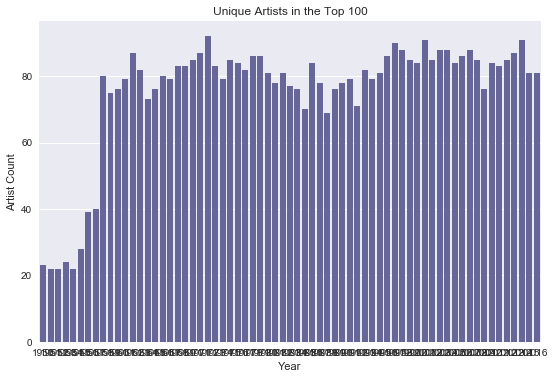

In [98]:
# How does that intra-year variety number change over time?
import matplotlib.pyplot as plt
import seaborn as sns

names = artists['year']
values = artists['artist_count']

sns.barplot(names, values, color='blue', saturation=0.2)
plt.xlabel('Year')
plt.ylabel('Artist Count')
plt.title('Unique Artists in the Top 100')

plt.bar(names, values)
plt.show()


                artist  firstyear  lastyear  span
469               Cher       1965      1999    35
2571  The Four Seasons       1962      1994    33
138    Aretha Franklin       1967      1998    32
1736   Michael Jackson       1972      2002    31
2469    The Beach Boys       1962      1988    27
221        Ben E. King       1961      1987    27
820         Elton John       1972      1998    27
63           Aerosmith       1976      2001    26
50       Aaron Neville       1967      1991    25
844       Eric Clapton       1974      1997    24


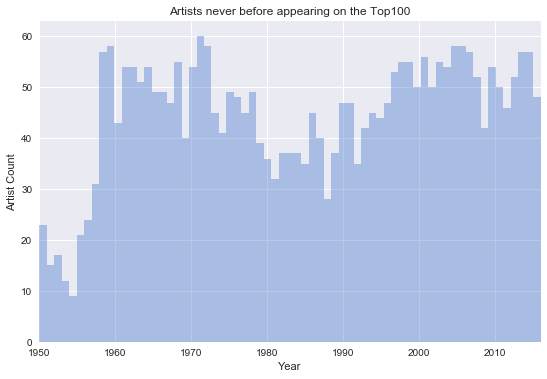

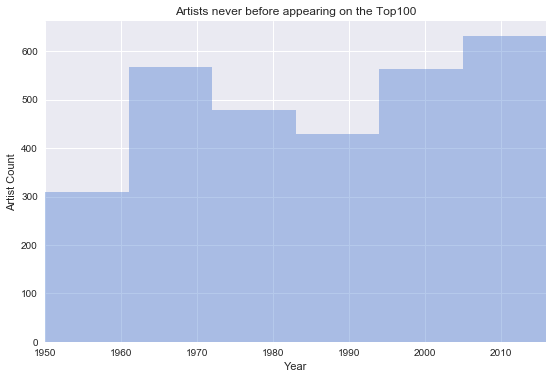

In [119]:
# Here's a question: how many brand new artists per year?
# brand new artist = never seen on the charts before

# Histogram with one bin per year in our data
fig, ax = plt.subplots()
ax.set_xlim([1950, 2016])
sns.distplot(first_year.year, bins=67, kde=False)
plt.xlabel('Year')
plt.ylabel('Artist Count')
plt.title('Artists never before appearing on the Top100')
plt.show()

# Alternate histogram where bins cover about ten years.
# Kind of looks like baby boomers stopped dominating music once CDs died.
fig, ax = plt.subplots()
ax.set_xlim([1950, 2016])
sns.distplot(first_year.year, bins=6, kde=False)
plt.xlabel('Year')
plt.ylabel('Artist Count')
plt.title('Artists never before appearing on the Top100')
plt.show()

In [122]:
# What about how individual artists have dominated the charts over time?

# Count total hits per artist, sort descending on total hits.
hits = data.groupby('artist').title.nunique().reset_index()
hits.columns = ['artist','hitcount']
print(hits.sort_values(['hitcount'], ascending = False).head(20))

# Count lifespan of a chart-maker's career as a chart-maker
firsts = data.groupby('artist').year.min().reset_index()
lasts = data.groupby('artist').year.max().reset_index()
longevity = pd.merge(firstyear, lastyear, on='artist') 
longevity.columns = ['artist','firstyear','lastyear']
longevity['span'] = longevity.apply(lambda row: row.lastyear - row.firstyear + 1, axis=1)
print(longevity.sort_values('span',ascending=False).head(20))

# Next step to join these somehow, visualize somehow..

                   artist  hitcount
823         Elvis Presley        34
1638              Madonna        34
820            Elton John        26
2470          The Beatles        26
1650         Mariah Carey        22
2376        Stevie Wonder        22
1736      Michael Jackson        22
1188        Janet Jackson        20
2922      Whitney Houston        18
1070         Hall & Oates        17
2125              Rihanna        17
2010                 Pink        16
476               Chicago        15
2123         Ricky Nelson        15
2432         Taylor Swift        15
2160          Rod Stewart        14
2480  The Black Eyed Peas        14
374        Britney Spears        14
1983           Perry Como        14
138       Aretha Franklin        14
                artist  firstyear  lastyear  span
469               Cher       1965      1999    35
2571  The Four Seasons       1962      1994    33
138    Aretha Franklin       1967      1998    32
1736   Michael Jackson       1972      2002 